In [272]:
import numpy as np
import matplotlib as plt
import pandas as pd
import scipy as sp
import numpy as np
import sklearn
import xgboost as xgb
import shap
import lime
import lime.lime_tabular
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

shap.initjs()

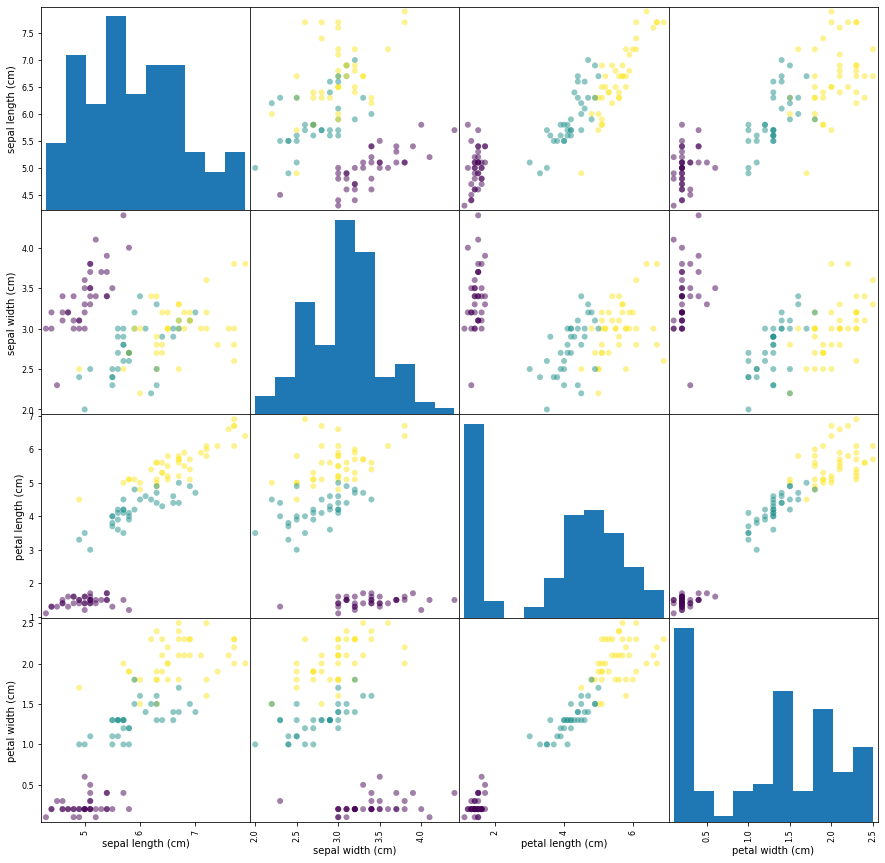

In [273]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
features = iris_dataset.feature_names
X,y = iris_dataset['data'], iris_dataset['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o')

In [274]:
model = xgb.XGBClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9736842105263158

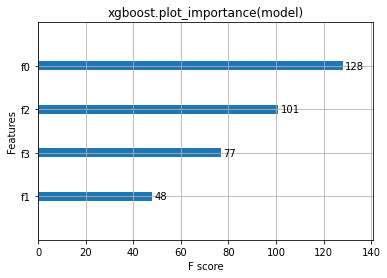

In [275]:
xgb.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [276]:
explainer = shap.TreeExplainer(xgb_model,feature_names=features)
shap_values = explainer.shap_values(X)

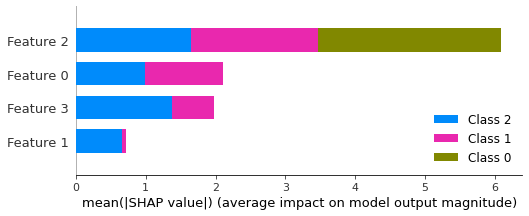

In [277]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [278]:
shap.force_plot(explainer.expected_value[0], shap_values[-1], X)

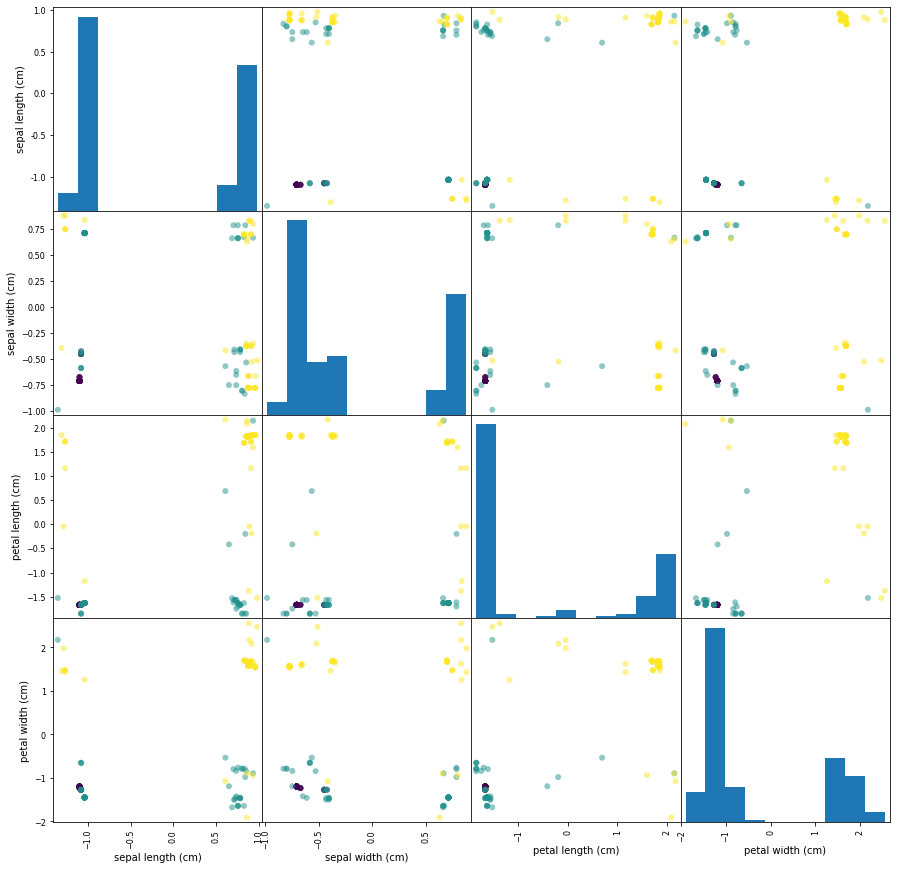

In [279]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

shap_dataframe = pd.DataFrame(shap_values[-1], columns=iris_dataset.feature_names)
shap_data = shap_values[-1].astype(np.double)
pd.plotting.scatter_matrix(shap_dataframe, c=y, figsize=(15,15),marker='o')
plt.show()

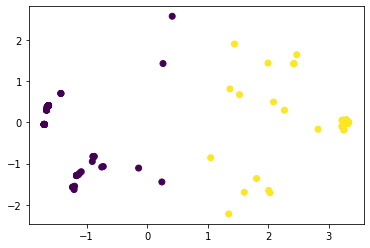

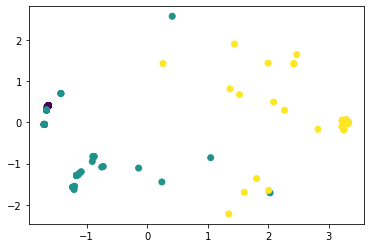

In [280]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(shap_data)

cat = model.predict(shap_data)
clusters = np.unique(cat)

dims = PCA(n_components=2).fit_transform(shap_data)
dims = pd.DataFrame(dims,columns=['PC1','PC2'])

plt.scatter(dims['PC1'],dims['PC2'],c=model.predict(shap_data))
plt.show()
plt.scatter(dims['PC1'],dims['PC2'],c=y)

In [281]:
from scipy.stats.stats import pearsonr     
print(pearsonr(model.predict(shap_data),y))

(0.8445765603251978, 5.455787107554235e-42)


In [282]:
lime_values = np.zeros((len(y),4))

explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=features, verbose=True, mode='classification')

for i in range(len(y)):
    exp = explainer.explain_instance(X[0], xgb_model.predict_proba, num_features=10)
    _,lime_values_ = list(zip(*exp.as_list()))
    lime_values_ = np.array(lime_values_)
    lime_values[i] = lime_values_

Intercept 0.4855256573442579
Prediction_local [0.09781328]
Right: 0.00474845
Intercept 0.47268203730357095
Prediction_local [0.12297274]
Right: 0.00474845
Intercept 0.48994969710694464
Prediction_local [0.09795321]
Right: 0.00474845
Intercept 0.4919130427489412
Prediction_local [0.09302093]
Right: 0.00474845
Intercept 0.48435836700914364
Prediction_local [0.09883781]
Right: 0.00474845
Intercept 0.48065496895543447
Prediction_local [0.1120881]
Right: 0.00474845
Intercept 0.49566661917983834
Prediction_local [0.11290528]
Right: 0.00474845
Intercept 0.5062398985747738
Prediction_local [0.08664753]
Right: 0.00474845
Intercept 0.47414435883968287
Prediction_local [0.10569098]
Right: 0.00474845
Intercept 0.47485350007697863
Prediction_local [0.11883224]
Right: 0.00474845
Intercept 0.48411712778991967
Prediction_local [0.11752655]
Right: 0.00474845
Intercept 0.4804212328177659
Prediction_local [0.09817988]
Right: 0.00474845
Intercept 0.4888875828847895
Prediction_local [0.11302615]
Right: 0.0

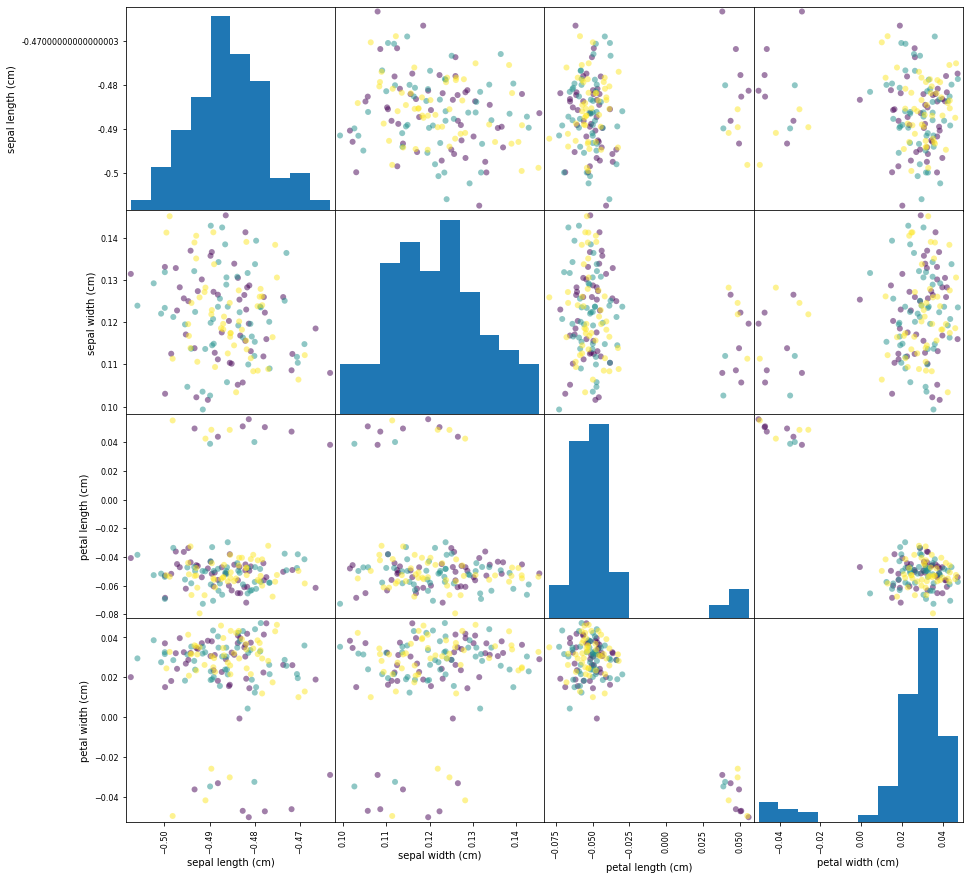

In [283]:
lime_dataframe = pd.DataFrame(lime_values, columns=iris_dataset.feature_names)
lime_data = lime_values.astype(np.double)
pd.plotting.scatter_matrix(lime_dataframe, c=y, figsize=(15,15),marker='o')
plt.show()

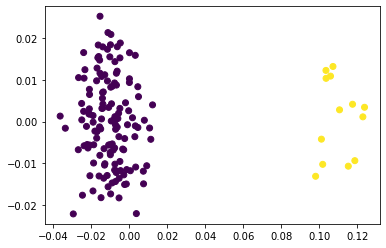

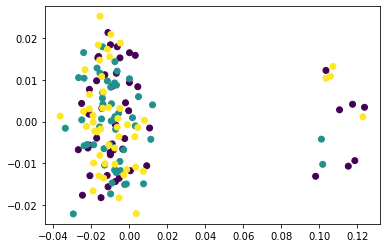

In [284]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(lime_data)

cat = model.predict(lime_data)
clusters = np.unique(cat)

dims = PCA(n_components=2).fit_transform(lime_data)
dims = pd.DataFrame(dims,columns=['PC1','PC2'])

plt.scatter(dims['PC1'],dims['PC2'],c=model.predict(lime_data))
plt.show()
plt.scatter(dims['PC1'],dims['PC2'],c=y)

In [285]:
print(pearsonr(model.predict(lime_data),y))

(-0.08706325993004321, 0.28941955880517606)
